<center>
    <h1> Reconocimiento de Patrones en Minería de Datos  </h1>
    <h2> Tarea #1: Beer Clustering</h2>
    <br>
    _María Carolina Peña González_ -  maria.pena@alumnos.usm.cl  -  rol: 2973535-2 
    <br>
    _Slavko Cotoras Straub_ -  slavko.cotoras@alumnos.usm.cl  -  rol: 201104504-1
</center>
</center>

 


## Introducción


Para el desarrollo de esta tarea, se trabajará con el dataset beeradvocate, el cual consiste en una colección de reseñas de cervezas del sitio Beer Advocate, de un periodo de más de 10 años, incluyendo 1.586.614 reseñas hasta noviembre del 2011. Cada reseña incluye el id y nombre de brewery, la fecha, el nombre, id y tipo de cerveza,  un ranking de 5 aspectos: apariencia, aroma, paladar, sabor e impresión general.  <br> Con este dataset se probarán 5 algoritmos de clustering, mostrando los resultados obtenidos.

Se listan los tipos de datos a continuación:

        brewery_id           Id de cervecería                             numérico
        brewery_name         Nombre de cervecería                         string
        review_time          Fecha de reseña                              numérico
        review_overall       Impresión general                            numérico 
        review_aroma         Aroma                                        numérico
        review_appearance    Apariencia                                   numérico
        review_profilename   Nombre de perfil                             string
        beer_style           Estilo de cerveza                            string
        review_palate        Paladar                                      numérico
        review_taste         Sabor                                        numérico
        beer_name            Nombre de cerveza                            string
        beer_abv             Alcohol By Volume - Grados de alcohol        numérico
        beer_beerid          Id de cerveza                                numérico

# Desarrollo


In [1]:
# Librerias a usar
%matplotlib inline
import pandas
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
#warnings
import warnings
warnings.simplefilter("ignore", UserWarning)
import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)


Una vez que se conoce el dataset se procede a cargarlo para posteriormente analizarlo mediante el uso de cada algoritmo a utilizar en el estudio. Dado problemas durante el procedimiento de la investigación usando el dataset completo, se procede a hacer uso de una muestra del dataset correspondiente al 1%, dicho porcentaje es elegido dado que es el porcentaje más alto en que se pudo realizar el estudio de una buena manera, al aumentar la cantidad de elementos en la muestra del dataset, se presentaba un error en memoria dado la gran cantidad de memoria que requiere para realizar la investigación.
Por otra parte, se inicializan arbitrariamente la cantidad de clusters y el epsilon a utilizar durante el primer análisis de los algoritmos.

In [2]:
#---------------------------------------------------------------------#
#                     Clustering Parameters                           #
#---------------------------------------------------------------------#

# Porcentaje de la Muestra del Dataset
N = 0.005

# Clusters
K = 5

#Eps
eps = 0.3

In [3]:
#---------------------------------------------------------------------#
#                         Load CSV File                               #
#---------------------------------------------------------------------#

# Se carga el archivo csv
csv_dataframe = pandas.read_csv("beer_reviews.csv", na_values="NaN")

# Se considera solo los atributos de tipo numericos
X = csv_dataframe._get_numeric_data()

# Se eliminan las filas que contengan algun valor no definido
X = X.dropna()

# Se eliminan filas que no aporten informacion, dejando sólo los datos de evaluación de 1 a 5.
X = X.drop('brewery_id', 1)
X = X.drop('review_time', 1)
X = X.drop('beer_beerid', 1)
X= X.drop('beer_abv',1)

X_matriz = X.as_matrix()

# Se considera una muestra del dataset
X = X.sample(frac=N, replace=True)
n_samples, n_features = X.shape

In [4]:
#---------------------------------------------------------------------#
#                               Seed                                  #
#---------------------------------------------------------------------#
np.random.seed(0)

In [5]:
# Muestra del Dataset
tam = 1586614*N
X_new = X_matriz[:tam]

In [8]:
X_new.size

39665

In [9]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 10)

Populating the interactive namespace from numpy and matplotlib


In [65]:
#---------------------------------------------------------------------#
#                     Visualize the clustering                        #
#---------------------------------------------------------------------#
def plot_clustering(X_red, labels, title=None, cs_subplot=None, subplot=0):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    if subplot is None:
        plt.figure(figsize=(6, 4))
    
    if subplot is not 0:
        plt.subplot(subplot)
    
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], '.',
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
        
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout() 



In [ ]:
size(X_new)

In [ ]:
#---------------------------------------------------------------------#
#                2D embedding of the digits dataset                   #
#---------------------------------------------------------------------#
#X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
X_blue = manifold.SpectralEmbedding(n_components=2).fit_transform(X_new)

In [10]:
#---------------------------------------------------------------------#
#                2D embedding of the digits dataset with PCA          #
#---------------------------------------------------------------------#
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_new) #calcula vp
X_green = pca.transform(X_new)

In [62]:
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 6)

Populating the interactive namespace from numpy and matplotlib


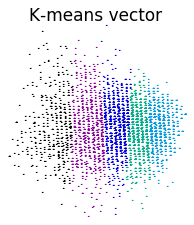

In [77]:
#---------------------------------------------------------------------#
#                               K-Means                               #
#---------------------------------------------------------------------#
k_means = KMeans(init="random", n_clusters=K, n_init=10)
k_means.fit(X_green)
#k_means.fit(X_red)
#plot_clustering(X_blue, X_new, k_means.labels_, "K-Means", subplot=231)

#plot_clustering(X_red, X, k_means.labels_, "K-Means", subplot=232)
plot_clustering(X_green,k_means.labels_,"K-means vector",subplot=233)


In [ ]:
size(X_green)

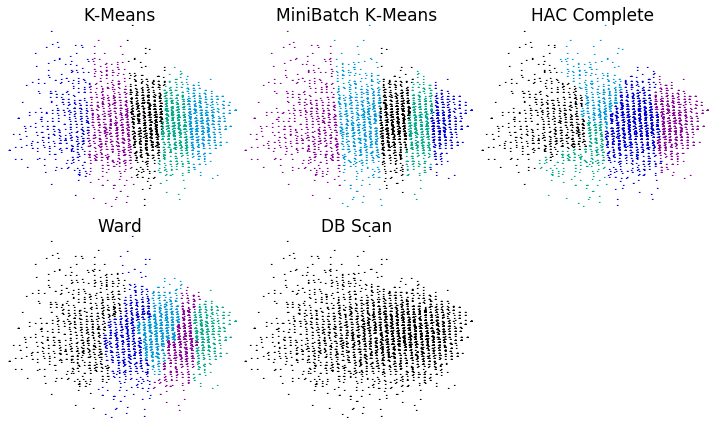

In [15]:
#---------------------------------------------------------------------#
#                               K-Means                               #
#---------------------------------------------------------------------#
k_means = KMeans(init="random", n_clusters=K, n_init=10)
k_means.fit(X_green)

plot_clustering(X_green, X, k_means.labels_, "K-Means", subplot=231)

#---------------------------------------------------------------------#
#                         MiniBatch K-Means                           #
#---------------------------------------------------------------------#
mb_k_means = MiniBatchKMeans(n_clusters=K)
mb_k_means.fit(X_green)

plot_clustering(X_green, X, mb_k_means.labels_, "MiniBatch K-Means",1, subplot=232)

#---------------------------------------------------------------------#
#                           HAC Complete                              # 
#---------------------------------------------------------------------#
hac_complete = AgglomerativeClustering(linkage="complete", n_clusters=K, affinity="euclidean")
hac_complete.fit(X_green)

plot_clustering(X_green, X, hac_complete.labels_, "HAC Complete",1, subplot=233)

#---------------------------------------------------------------------#
#                                Ward                                 #
#---------------------------------------------------------------------#
ward = AgglomerativeClustering(linkage="ward", n_clusters=K, affinity="euclidean")
ward.fit(X_green)

plot_clustering(X_green, X, ward.labels_, "Ward",1, subplot=234)

#---------------------------------------------------------------------#
#                           DB Scan                                   #
#---------------------------------------------------------------------#
db_scan = DBSCAN(eps=eps, min_samples=15)
db_scan.fit(X_green)

plot_clustering(X_green, X, db_scan.labels_, "DB Scan",1, subplot=235)

plt.show()

In [16]:
#---------------------------------------------------------------------#
#                   Estimate Number of Clusters                       #
#---------------------------------------------------------------------#

# Rango de Clusters
cluster_range = range(1, 11)

# Elbow Methods Variables
cluster_errors = []

# Silhouette Score Variables
silhouette_rcmd = 0
n_clusters_rcmd = 0
silhouette_array = []

for n_clusters in cluster_range:
    clusters = KMeans(n_clusters)
    clusters.fit(X_green)

    cluster_errors.append( clusters.inertia_ )

    # Silhouette Score Restriction
    if(n_clusters == 1):
        continue

    cluster_labels = clusters.fit_predict( X_green )
    silhouette_avg = silhouette_score(X_green, cluster_labels)
    
    silhouette_array.append(silhouette_avg)

    # Almacena el numero de clusters recomendado
    if silhouette_avg > silhouette_rcmd:
        silhouette_rcmd = silhouette_avg
        n_clusters_rcmd = n_clusters

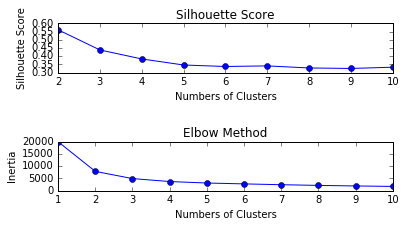

In [17]:
#---------------------------------------------------------------------#
#                    Plot Silhouette Score Graph                      #
#---------------------------------------------------------------------#
clusters_silhouette_df = pandas.DataFrame( { "num_clusters":cluster_range[1:], "silhouette_score": silhouette_array } )

plt.figure(figsize=(6,3))

plt.subplot(311)
plt.plot( clusters_silhouette_df.num_clusters, clusters_silhouette_df.silhouette_score, marker = "o" )
plt.title("Silhouette Score")
plt.xlabel("Numbers of Clusters")
plt.ylabel("Silhouette Score")

#---------------------------------------------------------------------#
#                    Plot Elbow Methods Graph                         #
#---------------------------------------------------------------------#
clusters_elbow_df = pandas.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

plt.subplot(313)
plt.plot( clusters_elbow_df.num_clusters, clusters_elbow_df.cluster_errors, marker = "o" )
plt.title("Elbow Method")
plt.xlabel("Numbers of Clusters")
plt.ylabel("Inertia")
plt.show()

In [19]:
#---------------------------------------------------------------------#
#           Re-Computing Algorithms with new Parameters               #
#---------------------------------------------------------------------#

# Clusters
new_K = n_clusters_rcmd

In [20]:
new_K

2

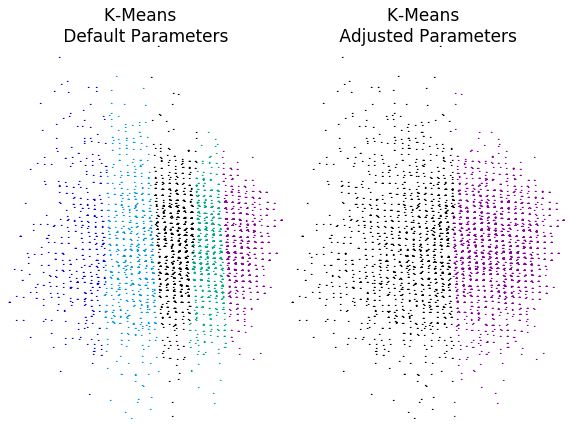

In [66]:
#---------------------------------------------------------------------#
#                            K-Means                                  #
#---------------------------------------------------------------------#
k_means = KMeans(init="random", n_clusters=K, n_init=10)
k_means.fit(X_green)

plot_clustering(X_green, k_means.labels_, "K-Means \n Default Parameters", subplot = 121)
k_means = KMeans(init="random", n_clusters=new_K, n_init=10)
k_means.fit(X_green)
plot_clustering(X_green, k_means.labels_, "K-Means \n Adjusted Parameters",subplot  = 122)
plt.show()

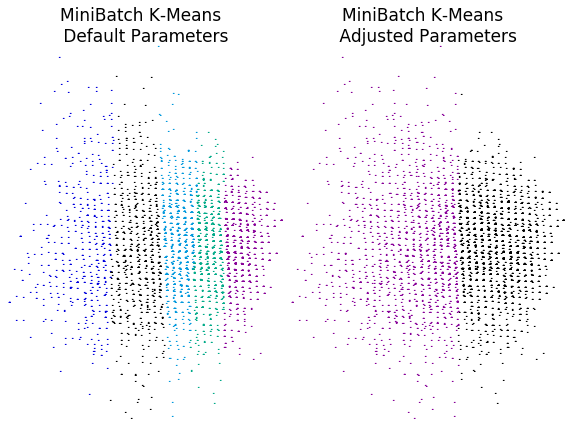

In [74]:
#---------------------------------------------------------------------#
#                         MiniBatch K-Means                           #
#---------------------------------------------------------------------#
mb_k_means = MiniBatchKMeans(n_clusters=K)
mb_k_means.fit(X_green)

plot_clustering(X_green, mb_k_means.labels_, "MiniBatch K-Means \n Default Parameters", subplot = 121)
mb_k_means = MiniBatchKMeans(n_clusters=new_K)
mb_k_means.fit(X_green)

plot_clustering(X_green, mb_k_means.labels_, "MiniBatch K-Means \n Adjusted Parameters", subplot = 122)
plt.show()

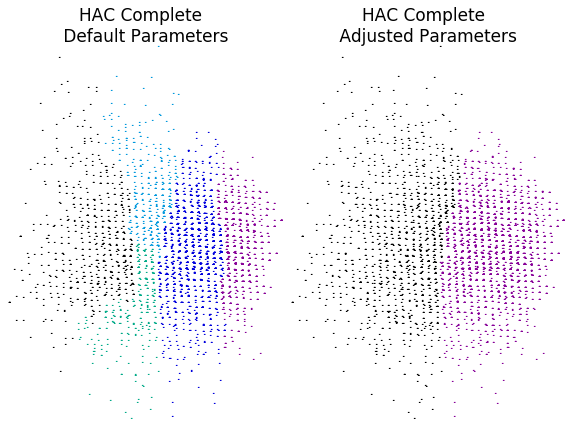

In [78]:
#---------------------------------------------------------------------#
#                           HAC Complete                              # 
#---------------------------------------------------------------------#
hac_complete = AgglomerativeClustering(linkage="complete", n_clusters=K, affinity="euclidean")
hac_complete.fit(X_green)

plot_clustering(X_green, hac_complete.labels_, "HAC Complete \n Default Parameters", subplot = 121) 
hac_complete = AgglomerativeClustering(linkage="complete", n_clusters=new_K, affinity="euclidean")
hac_complete.fit(X_green)

plot_clustering(X_green,   hac_complete.labels_, "HAC Complete \n Adjusted Parameters", subplot = 122) 
plt.show()

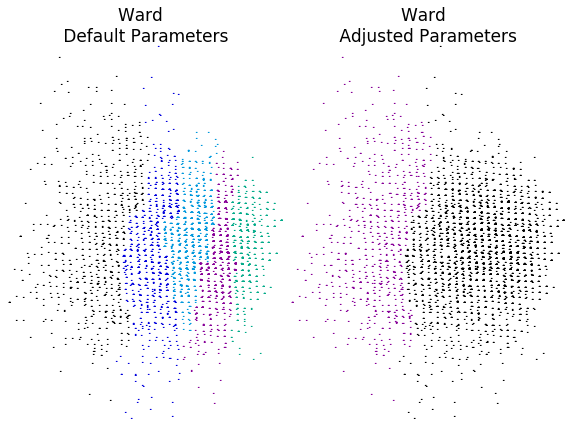

In [75]:
#---------------------------------------------------------------------#
#                                Ward                                 #
#---------------------------------------------------------------------#
ward = AgglomerativeClustering(linkage="ward", n_clusters=K, affinity="euclidean")
ward.fit(X_green)

plot_clustering(X_green,   ward.labels_, "Ward \n Default Parameters", subplot = 121)
 
ward = AgglomerativeClustering(linkage="ward", n_clusters=new_K, affinity="euclidean")
ward.fit(X_green)

plot_clustering(X_green,   ward.labels_, "Ward \n Adjusted Parameters", subplot = 122)
plt.show()

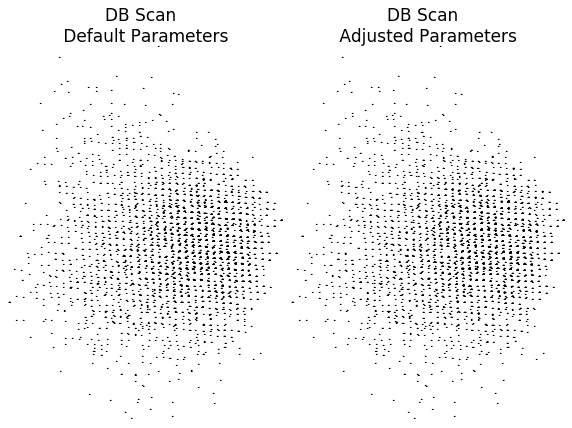

In [79]:
#---------------------------------------------------------------------#
#                           DB Scan                                   #
#---------------------------------------------------------------------#
db_scan = DBSCAN(eps=eps, min_samples=15)
db_scan.fit(X_green)

plot_clustering(X_green,  db_scan.labels_, "DB Scan \n Default Parameters", subplot = 121)
 
db_scan = DBSCAN(eps=0.7, min_samples=15)
db_scan.fit(X_green)

plot_clustering(X_green,  db_scan.labels_, "DB Scan \n Adjusted Parameters", subplot = 122)
plt.show()

In [ ]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 12)